# Analiza danych – ćwiczenia 1.
### Przygotowanie środowiska Python


##### Autor: mgr inż. Bartosz Czech

---

###### 1. Upewnij się, że korzystasz z Pythona w wersji 3.7:

In [1]:

from platform import python_version
print(python_version())

3.7.3


###### 2. Zaimportuj potrzebne biblioteki:

In [2]:
import tensorflow as tf
print("Moja wersja TensorFlow: " + tf.__version__)

# W przypadku wystąpienia błędów, zaktualizuj bibliotekę NumPy

/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorflow/python/f

Moja wersja TensorFlow: 1.14.0


/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/czechb3/miniconda3/lib/python3.7/site-package

In [3]:
import keras
print("Moja wersja Keras: " + keras.__version__)

Moja wersja Keras: 2.3.1


Using TensorFlow backend.


In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd

###### 3. Zaimportuj dane:

In [5]:
data = pd.read_csv("../data/logreg.txt", sep = ";")

In [6]:
data.head() # zwraca 5 pierwszych wierszy z pliku

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
0,1,87093,74,50.0,63.0,3,C,C,A,A,A,A
1,1,56419,64,9.0,100.0,3,A,G,G,A,C,A
2,1,40180,68,48.0,NaN,2,A,G,G,T,A,A
3,1,33677,57,48.0,3.0,3,C,A,C,G,G,G
4,1,78396,51,50.0,21.0,5,A,A,T,A,A,A


In [7]:
data.shape # odpowiednik funkcji dim() w R

(2294151, 12)

In [8]:
print(data.dtypes) # wyświetla typ każdej z kolumn

genotype      int64
QUAL          int64
DP            int64
DP2         float64
GQ          float64
CALL          int64
BEFORE1      object
BEFORE2      object
BEFORE3      object
BEHIND1      object
BEHIND2      object
BEHIND3      object
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x142b21a58>,
      dtype=object)

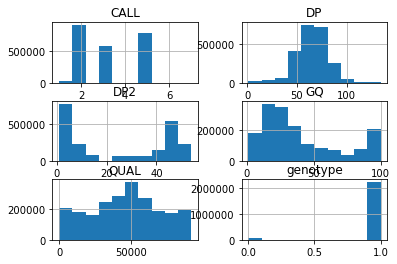

In [9]:
data.hist()

In [10]:
data.sample(10) # zwraca 10 losowych wierszy z pliku

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
1688137,1,51575,68,2.0,NaN,2,A,G,G,T,T,C
1992617,1,86002,80,3.0,100.0,3,C,A,T,A,T,G
543715,1,43933,63,7.0,72.0,3,A,T,C,G,G,T
787177,1,73149,56,41.0,11.0,5,T,T,T,C,C,C
1274883,1,48617,77,2.0,97.0,3,C,A,T,T,A,G
672690,1,6738,44,24.0,90.0,5,A,T,C,G,G,G
281210,1,81615,57,48.0,15.0,5,C,T,C,A,A,C
952496,1,2012,67,2.0,25.0,5,G,G,A,A,A,G
683717,1,84646,54,2.0,25.0,2,G,A,A,A,A,A
2113855,1,51929,72,46.0,NaN,2,C,C,C,A,C,T


In [11]:
data.BEFORE1.value_counts() # zlicza liczbę unikalnych wartości dla pola BEFORE1 

A    675363
T    646812
C    502635
G    469341
Name: BEFORE1, dtype: int64

In [12]:
data.describe() # odpowiednik summary() w R; statystyki opisowe dla kolumn typu numerycznego

,genotype,QUAL,DP,DP2,GQ,CALL
count,2.294151e+06,2.294151e+06,2.294151e+06,2.270416e+06,1.729625e+06,2.294151e+06
mean,9.674110e-01,4.618698e+04,6.580229e+01,2.458300e+01,3.951257e+01,3.270535e+00
std,1.775583e-01,2.434921e+04,1.663050e+01,1.972824e+01,3.018805e+01,1.316337e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.866200e+04,5.600000e+01,4.000000e+00,1.800000e+01,2.000000e+00
50%,1.000000e+00,4.746200e+04,6.500000e+01,2.300000e+01,2.800000e+01,3.000000e+00
75%,1.000000e+00,6.359900e+04,7.500000e+01,4.600000e+01,5.700000e+01,5.000000e+00
max,1.000000e+00,9.177700e+04,1.340000e+02,5.400000e+01,1.000000e+02,7.000000e+00


In [13]:
data.isnull()

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2294146,False,False,False,False,True,False,False,False,False,False,False,False
2294147,False,False,False,False,True,False,False,False,False,False,False,False
2294148,False,False,False,False,True,False,False,False,False,False,False,False
2294149,False,False,False,False,True,False,False,False,False,False,False,False


---

**1.** Stwórz ramkę danych zawierającą output metody describe() wraz z liczbą brakujących danych dla każdej kolumny.

**2.** Sprawdź poprawność kolumn BEFORE\* oraz BEHIND\*, tzn. upewnij się, że kolumy zawierają tylko oznaczenia nukleotydów oraz czy formatowanie jest jednolite.